# Scrapping data from Wikipedia

## Import libabries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import missingno
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

## Scrap and load data

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_books'

In [3]:
html_content=requests.get(url).text

In [4]:
soup = BeautifulSoup(html_content,"html.parser")

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of best-selling books - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c904aca8-e1ea-45c4-852c-148270be21dc","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_best-selling_books","wgTitle":"List of best-selling books","wgCurRevisionId":1036146050,"wgRevisionId":1036146050,"wgArticleId":2512935,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Webarchive template archiveis links","CS1 Italian-language sources (it)","

In [6]:
def el_attrs(obj, el):
    li_els = obj.find_all(el)
    print(type(li_els))
    print(len(li_els))
    return [x.attrs for x in li_els]

In [7]:
el_attrs(soup, 'table')

<class 'bs4.element.ResultSet'>
17


[{'class': ['box-Globalize',
   'plainlinks',
   'metadata',
   'ambox',
   'ambox-content',
   'ambox-globalize'],
  'role': 'presentation'},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['wikitable', 'sortable']},
 {'class': ['nowraplinks',
   'hlist',
   'mw-collapsible',
   'autocollapse',
   'navbox-inner'],
  'style': 'border-spacing:0;background:transparent;color:inherit'}]

In [8]:
soup.find_all("table")

[<table class="box-Globalize plainlinks metadata ambox ambox-content ambox-globalize" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="Globe icon." data-file-height="290" data-file-width="350" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Ambox_globe_content.svg/48px-Ambox_globe_content.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Ambox_globe_content.svg/73px-Ambox_globe_content.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Ambox_globe_content.svg/97px-Ambox_globe_content.svg.png 2x" width="48"/></div></td><td class="mbox-text"><div class="mbox-text-span">The examples and perspective in this article <b>may not represent a <a href="/wiki/Wikipedia:WikiProject_Countering_systemic_bias" title="Wikipedia:WikiProject Countering systemic bias">worldwide view</a> of the subject</b>.<span class="hide-when-compact"> You may <a class="external text" href="https://en.wikipedi

In [9]:
len(soup.find_all("table"))

17

## List of best-selling individual books

In [10]:
table1=soup.find("table",attrs={"class":"wikitable sortable"})

In [11]:
table1

<table class="wikitable sortable">
<tbody><tr>
<th>Book</th>
<th>Author(s)</th>
<th>Original language</th>
<th>First published</th>
<th>Approximate sales
</th>
<th>Genre
</th></tr>
<tr>
<td><i><a href="/wiki/The_Hobbit" title="The Hobbit">The Hobbit</a></i></td>
<td><a href="/wiki/J._R._R._Tolkien" title="J. R. R. Tolkien">J. R. R. Tolkien</a></td>
<td>English</td>
<td>1937</td>
<td>140.6 million<sup class="reference" id="cite_ref-TheHobbit_17-0"><a href="#cite_note-TheHobbit-17">[17]</a></sup>
</td>
<td><a href="/wiki/Fantasy" title="Fantasy">Fantasy</a>
</td></tr>
<tr>
<td><i><a href="/wiki/Harry_Potter_and_the_Philosopher%27s_Stone" title="Harry Potter and the Philosopher's Stone">Harry Potter and the Philosopher's Stone</a></i></td>
<td><a href="/wiki/J._K._Rowling" title="J. K. Rowling">J. K. Rowling</a></td>
<td>English</td>
<td>1997</td>
<td>120 million<sup class="reference" id="cite_ref-18"><a href="#cite_note-18">[18]</a></sup><sup class="reference" id="cite_ref-19"><a href="#

In [12]:
headers = [header.text.strip() for header in table1('th')]

In [13]:
headers

['Book',
 'Author(s)',
 'Original language',
 'First published',
 'Approximate sales',
 'Genre']

In [14]:
all_table = soup.find_all("table",attrs={"class":"wikitable sortable"})

In [15]:
all_table

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Book</th>
 <th>Author(s)</th>
 <th>Original language</th>
 <th>First published</th>
 <th>Approximate sales
 </th>
 <th>Genre
 </th></tr>
 <tr>
 <td><i><a href="/wiki/The_Hobbit" title="The Hobbit">The Hobbit</a></i></td>
 <td><a href="/wiki/J._R._R._Tolkien" title="J. R. R. Tolkien">J. R. R. Tolkien</a></td>
 <td>English</td>
 <td>1937</td>
 <td>140.6 million<sup class="reference" id="cite_ref-TheHobbit_17-0"><a href="#cite_note-TheHobbit-17">[17]</a></sup>
 </td>
 <td><a href="/wiki/Fantasy" title="Fantasy">Fantasy</a>
 </td></tr>
 <tr>
 <td><i><a href="/wiki/Harry_Potter_and_the_Philosopher%27s_Stone" title="Harry Potter and the Philosopher's Stone">Harry Potter and the Philosopher's Stone</a></i></td>
 <td><a href="/wiki/J._K._Rowling" title="J. K. Rowling">J. K. Rowling</a></td>
 <td>English</td>
 <td>1997</td>
 <td>120 million<sup class="reference" id="cite_ref-18"><a href="#cite_note-18">[18]</a></sup><sup class="reference" id

In [16]:
len(all_table)

15

In [17]:
first_5_tbl = all_table[0:5]
first_5_tbl

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Book</th>
 <th>Author(s)</th>
 <th>Original language</th>
 <th>First published</th>
 <th>Approximate sales
 </th>
 <th>Genre
 </th></tr>
 <tr>
 <td><i><a href="/wiki/The_Hobbit" title="The Hobbit">The Hobbit</a></i></td>
 <td><a href="/wiki/J._R._R._Tolkien" title="J. R. R. Tolkien">J. R. R. Tolkien</a></td>
 <td>English</td>
 <td>1937</td>
 <td>140.6 million<sup class="reference" id="cite_ref-TheHobbit_17-0"><a href="#cite_note-TheHobbit-17">[17]</a></sup>
 </td>
 <td><a href="/wiki/Fantasy" title="Fantasy">Fantasy</a>
 </td></tr>
 <tr>
 <td><i><a href="/wiki/Harry_Potter_and_the_Philosopher%27s_Stone" title="Harry Potter and the Philosopher's Stone">Harry Potter and the Philosopher's Stone</a></i></td>
 <td><a href="/wiki/J._K._Rowling" title="J. K. Rowling">J. K. Rowling</a></td>
 <td>English</td>
 <td>1997</td>
 <td>120 million<sup class="reference" id="cite_ref-18"><a href="#cite_note-18">[18]</a></sup><sup class="reference" id

In [18]:
#THIS IS YOUR CODE WITH SLIGHT MODIFICATION
rows = []

for table in first_5_tbl: #THIS IS MY MODIFICATION OF YOUR CODE
    data_rows = table.find_all('tr')
    for row in data_rows:
        value = row.find_all('td')
        beautified_value = [ele.text.strip() for ele in value]
        # Remove data arrays that are empty
        if len(beautified_value) == 0:
            continue
        rows.append(beautified_value)

In [19]:
len(rows)

166

In [20]:
#rows

In [21]:
for row in rows:
    if len(row) != 6:
        print(len(row), ':', row)

5 : ['Totto-chan, the Little Girl at the Window (窓ぎわのトットちゃん)', 'Tetsuko Kuroyanagi', 'Japanese', '1981', '18 million (in Japan and China)[113]']
5 : ['Matilda', 'Roald Dahl', 'English', '1988', '17 million [114]']
5 : ['The Book Thief', 'Markus Zusak', 'English', '2005', '16 million [115]']
5 : ['The Horse Whisperer', 'Nicholas Evans', 'English', '1995', '16 million[116]']
5 : ['Goodnight Moon', 'Margaret Wise Brown', 'English', '1947', '16 million[117]']
5 : ['The Neverending Story (Die unendliche Geschichte)', 'Michael Ende', 'German', '1979', '16 million[118]']
5 : ['Fifty Shades of Grey', 'E. L. James', 'English', '2011', '15.2 million in U.S.[119]']
5 : ['The Outsiders', 'S. E. Hinton', 'English', '1967', '15 million[120]']
5 : ['Guess How Much I Love You', 'Sam McBratney', 'English', '1994', '15 million[121]']
5 : ['Shōgun', 'James Clavell', 'English', '1975', '15 million[122]']
5 : ['The Poky Little Puppy', 'Janette Sebring Lowrey', 'English', '1942', '15 million[123]']
5 : ['Th

In [22]:
#Merge all data into a dataframe
df = pd.DataFrame(rows, columns=headers)

In [23]:
df.head()

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,The Hobbit,J. R. R. Tolkien,English,1937,140.6 million[17],Fantasy
1,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[18][19],Fantasy
2,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[20],Novella
3,Dream of the Red Chamber,Cao Xueqin,Chinese,18th century,100 million[20],Family saga
4,And Then There Were None,Agatha Christie,English,1939,100 million[21],Mystery


In [24]:
df.tail()

,Book,Author(s),Original language,First published,Approximate sales,Genre
161,The Goal,Eliyahu M. Goldratt,English,1984,10 million[170],None
162,Fahrenheit 451,Ray Bradbury,English,1953,10 million[171],None
163,Angela's Ashes,Frank McCourt,English,1996,10 million[172],None
164,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1925-1929,10 million[173],None
165,Bridget Jones's Diary,Helen Fielding,English,,10 million (as of 2005)[174],None


# Cleaning the dataset

In [25]:
from datetime import datetime
import re

In [26]:
#Check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Book               166 non-null    object
 1   Author(s)          166 non-null    object
 2   Original language  166 non-null    object
 3   First published    166 non-null    object
 4   Approximate sales  166 non-null    object
 5   Genre              102 non-null    object
dtypes: object(6)
memory usage: 7.9+ KB


In [27]:
df.dtypes

Book                 object
Author(s)            object
Original language    object
First published      object
Approximate sales    object
Genre                object
dtype: object

In [28]:
#Find and NaN Values
df.isnull().sum()

Book                  0
Author(s)             0
Original language     0
First published       0
Approximate sales     0
Genre                64
dtype: int64

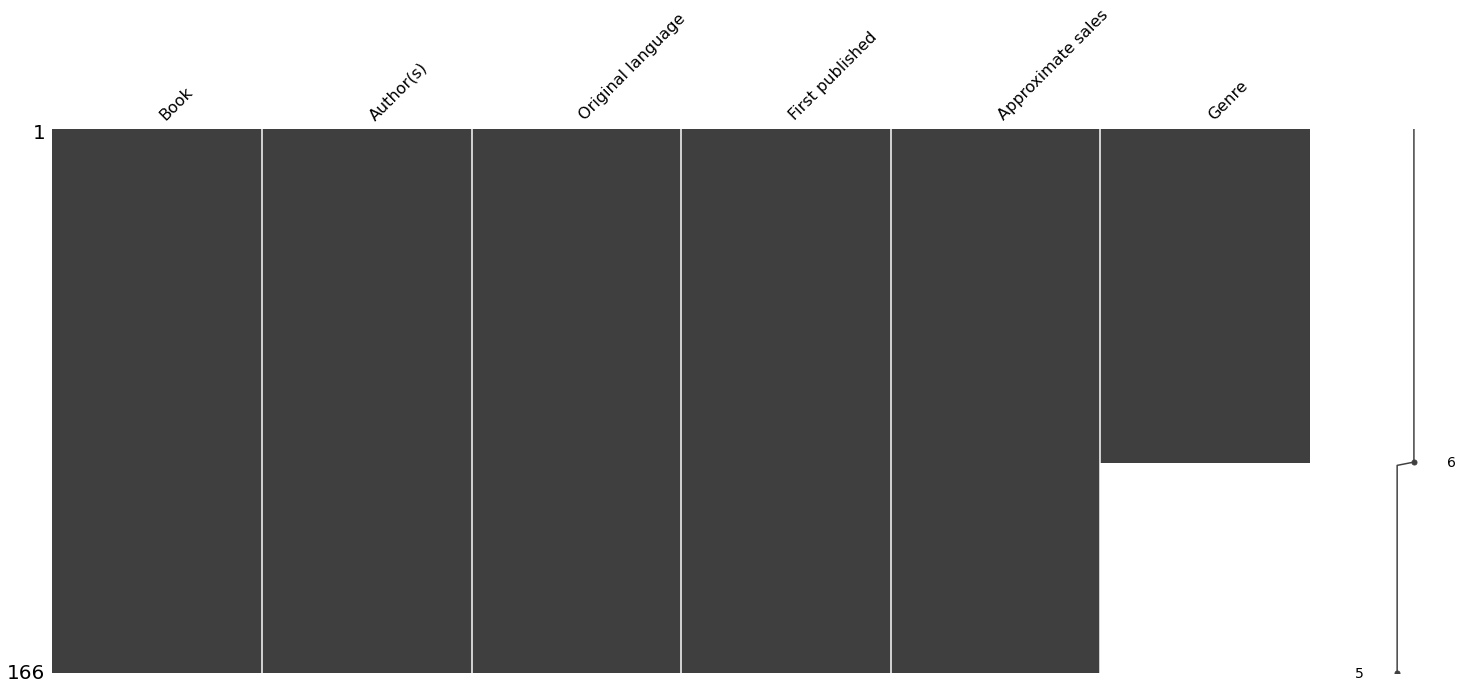

In [29]:
#Check NaN values
missingno.matrix(df)
plt.show()

All of missing values are located in "Genre" column. So I will replace the missing values with "Other"

In [30]:
#Replace missing values
df["Genre"] = df["Genre"].fillna("Other")

In [31]:
#Re-check NaN values
df.isnull().sum()

Book                 0
Author(s)            0
Original language    0
First published      0
Approximate sales    0
Genre                0
dtype: int64

In [32]:
#Check duplicate values
df.duplicated().sum()

0

In [33]:
df

,Book,Author(s),Original language,First published,Approximate sales,Genre
0,The Hobbit,J. R. R. Tolkien,English,1937,140.6 million[17],Fantasy
1,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[18][19],Fantasy
2,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[20],Novella
3,Dream of the Red Chamber,Cao Xueqin,Chinese,18th century,100 million[20],Family saga
4,And Then There Were None,Agatha Christie,English,1939,100 million[21],Mystery
...,...,...,...,...,...,...
161,The Goal,Eliyahu M. Goldratt,English,1984,10 million[170],Other
162,Fahrenheit 451,Ray Bradbury,English,1953,10 million[171],Other
163,Angela's Ashes,Frank McCourt,English,1996,10 million[172],Other
164,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1925-1929,10 million[173],Other


In [34]:
#Change the first published time into the right format
df["First published"][3] = "1800"

In [35]:
#Extract the right value (numerical value) from the "Approximate sales" column

In [36]:
df["Approximate sales"] = df["Approximate sales"].str.extract(r"(\d+|\d+.\d+)(?= million)")

In [37]:
df["Approximate sales"]= df["Approximate sales"].str.extract(r"(^\d+)")

In [38]:
#Change the data type from object to float
df["Approximate sales"]= df["Approximate sales"].astype(float)

In [39]:
df.tail()

,Book,Author(s),Original language,First published,Approximate sales,Genre
161,The Goal,Eliyahu M. Goldratt,English,1984,10.0,Other
162,Fahrenheit 451,Ray Bradbury,English,1953,10.0,Other
163,Angela's Ashes,Frank McCourt,English,1996,10.0,Other
164,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1925-1929,10.0,Other
165,Bridget Jones's Diary,Helen Fielding,English,,10.0,Other


In [40]:
#Remove the missing values in row 165 and modify the value in the row 164
df.drop(index=165,inplace=True)

In [41]:
df.replace({"1925-1929":"1925"},inplace=True)

In [42]:
df.dtypes

Book                  object
Author(s)             object
Original language     object
First published       object
Approximate sales    float64
Genre                 object
dtype: object

In [43]:
df['First published'] = df['First published'].astype('int64')

In [44]:
df.dtypes

Book                  object
Author(s)             object
Original language     object
First published        int64
Approximate sales    float64
Genre                 object
dtype: object

# Making analysis and visualization

## Most popular Languages

In [45]:
#Fill empty space in Genre column with NaN values

In [46]:
df.Genre= df.Genre.replace(r'^\s*$', np.NaN, regex=True)

In [47]:
#Replace NaN Values with "Other" in Genre column
df["Genre"] = df["Genre"].fillna("Other")

In [48]:
df.groupby(["Original language"])["Approximate sales"].sum().nlargest(10).sort_values(ascending=False).iplot(kind='bar', 
            xTitle ="Languages", 
            yTitle ="Amount of Sales in Million (USD)", 
            title = "The Most Popular Languages",color='blue')

## Most Popular Genres

In [49]:
df.groupby(["Genre"])["Approximate sales"].sum().nlargest(10).sort_values(ascending=False)

Genre
Other                    2486.0
Fantasy                   897.0
Children's literature     103.0
Children's fiction        100.0
Family saga               100.0
General                   100.0
Mystery                   100.0
Novella                   100.0
Children's Literature      88.0
Adventure                  83.0
Name: Approximate sales, dtype: float64

In [50]:
df.groupby(["Genre"])["Approximate sales"].sum().nlargest(10).sort_values(ascending=False).iplot(kind='bar', 
            xTitle ="Genre", 
            yTitle ="Amount of Sales in Million (USD)", 
            title = "The Most Popular Genres",color="red")

## Top 10 Most Selling Books of All Time

In [51]:
df.groupby(["Book"])["Approximate sales"].sum().nlargest(10).sort_values(ascending=False).iplot(kind='bar', 
            xTitle ="Name of the Most Selling Books", 
            yTitle ="Amount of Sales in Million (USD)", 
            title = "The Best Selling Books",color="green")